In [2]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from backtesters import MABacktester

In [8]:
# Get ETH prices for GDAX exchange
eth = quandl.get("GDAX/ETH_BTC")  # GDAX/ETH_USD
eth = eth.shift(-1).dropna() # GDAX has daily OPEN, shift to get daily CLOSE
eth.columns = [u'Last', u'High', u'Low', u'Volume'] # rename columns

In [32]:
# first trade occurs on 2018-05-16, using data from 18 days earlier (2018-04-29) only to calculate the MA
follow_up = eth.loc['2018-04-29':,'Last'] 
follow_up = MABacktester(follow_up,ms=1,ml=18)
follow_up.results()

{'Current_stance': 1,
 'Market': -51.11,
 'Market_pa': -83.31,
 'Market_sharpe': -3.2,
 'Sharpe': 1.31,
 'Strategy': 33.02,
 'Strategy_pa': 104.18,
 'Trades': 15,
 'Trades_per_month': 3.13,
 'Unrealised': -2.56,
 'Years': 0.4}

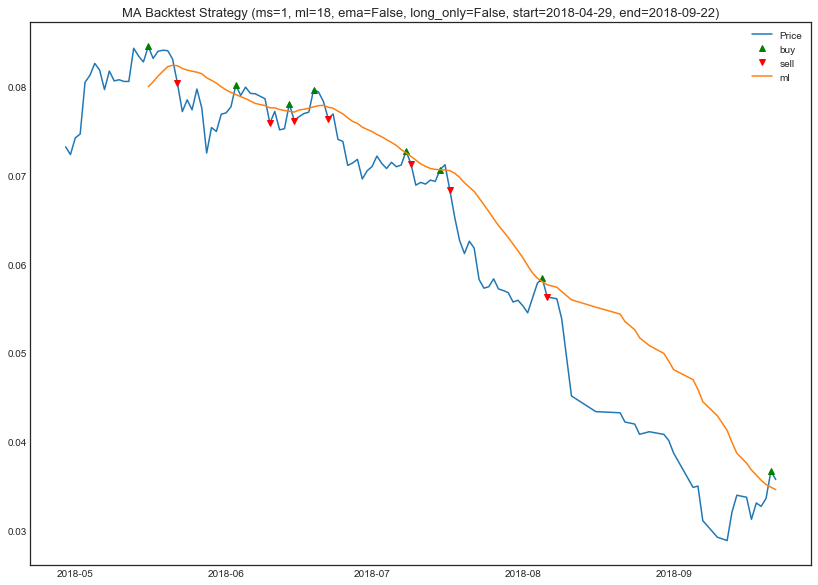

In [33]:
follow_up.plot(figsize=(14,10));

In [29]:
follow_up.trades()

,Type,Entry,Exit,Days,Return%
Date,,,,,
2018-05-16,Long,0.08448,0.08032,6,-4.92
2018-05-22,Short,0.08032,0.08012,12,0.25
2018-06-03,Long,0.08012,0.07584,7,-5.34
2018-06-10,Short,0.07584,0.07802,4,-2.79
2018-06-14,Long,0.07802,0.07615,1,-2.40
2018-06-15,Short,0.07615,0.07963,4,-4.37
2018-06-19,Long,0.07963,0.07635,3,-4.12
2018-06-22,Short,0.07635,0.07270,16,5.02
2018-07-08,Long,0.07270,0.07128,1,-1.95


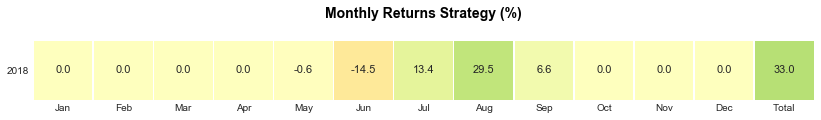

In [35]:
follow_up.plot_heatmap(figsize=(14,12));